In [1]:
# Import Dependencies
import quandl
import pandas as pd
import csv
import scipy.stats as stats
import matplotlib as plt
import datetime as datetime
#visualizing: Correlation function (monthly)

## Obtaining City Area Codes to query with Quandl library

In [2]:
#open and read areas_city which contains area codes to run queries with Quandl
city_file = open("Resources/city_codes.txt", 'r', newline = None)
city_list = city_file.readlines()


#remove header
city_list.pop(0)

# Make a list of cities contatining city, state, and area code
cities = []
for each in range(len(city_list)):
    # Split each line in text file into a list while removing \n 
    cities.append(city_list[each].strip("\n"))

cities = [item.replace("|", ",") for item in cities]


# # split the cities list into City, State, Area Code format
cities = [each.split(",") for each in cities]

cities


[['New York', 'NY', 'New York', 'Queens', '00001'],
 ['Los Angeles', 'CA', 'Los Angeles', 'Los Angeles', '00002'],
 ['Chicago', 'IL', 'Chicago', 'Cook', '00003'],
 ['Philadelphia', 'PA', 'Philadelphia', 'Philadelphia', '00004'],
 ['Phoenix', 'AZ', 'Phoenix', 'Maricopa', '00005'],
 ['Las Vegas', 'NV', 'Las Vegas', 'Clark', '00006'],
 ['San Diego', 'CA', 'San Diego', 'San Diego', '00007'],
 ['San Jose', 'CA', 'San Jose', 'Santa Clara', '00008'],
 ['Jacksonville', 'FL', 'Jacksonville', 'Duval', '00009'],
 ['San Francisco', 'CA', 'San Francisco', 'San Francisco', '00010'],
 ['Columbus', 'OH', 'Columbus', 'Franklin', '00011'],
 ['Detroit', 'MI', 'Detroit', 'Wayne', '00012'],
 ['Charlotte', 'NC', 'Charlotte', 'Mecklenburg', '00013'],
 ['Memphis', 'TN', 'Memphis', 'Shelby', '00014'],
 ['Baltimore', 'MD', 'Baltimore', 'Baltimore City', '00015'],
 ['Boston', 'MA', 'Boston', 'Suffolk', '00016'],
 ['Seattle', 'WA', 'Seattle', 'King', '00017'],
 ['Washington', 'DC', 'Washington', 'District of Colu

In [3]:
# Read ticker_list of companies that are of interest
ticker_file = "Resources/ticker_list.csv"

tickers_df = pd.read_csv(ticker_file)
tickers_df.head()

,name,city,state,ticker,quandl_code,industry_type
0,Cardinal Health Inc.,Dublin,OH,CAH,CAH,Other
1,FedEx Corporation,Memphis,TN,FDX,FDX,Other
2,Hawaiian Holdings Inc.,Honolulu,HI,HA,HA,Other
3,Las Vegas Sands Corp.,Las Vegas,NV,LVS,LVS,Other
4,Sanderson Farms Inc.,Laurel,MS,SAFM,SAFM,Other


In [4]:
# Search through dataframe contatining companies 
# in order to obtain area codes
# Store data into city_area_code list
city_area_code = []
for each in range(len(tickers_df)):
    current_city = tickers_df.city[each]
#     print(f'Current City: {current_city}')
    current_state = tickers_df.state[each]
#     print(f'Current State: {current_state}')
    
    for each in cities:
        if current_city == each[0] and current_state == each[1]:
            city_area_code.append(each[4])
city_area_code

['00900',
 '00014',
 '00036',
 '00006',
 '09782',
 '05910',
 '10447',
 '00013',
 '00067',
 '00100',
 '00648',
 '00017',
 '00562',
 '00001',
 '10463',
 '00948',
 '00032',
 '00282',
 '02290',
 '01274']

In [5]:
# Add a new column containing city area codes to tickers dataframe
tickers_df["area_code"] = city_area_code
tickers_df.head()

,name,city,state,ticker,quandl_code,industry_type,area_code
0,Cardinal Health Inc.,Dublin,OH,CAH,CAH,Other,00900
1,FedEx Corporation,Memphis,TN,FDX,FDX,Other,00014
2,Hawaiian Holdings Inc.,Honolulu,HI,HA,HA,Other,00036
3,Las Vegas Sands Corp.,Las Vegas,NV,LVS,LVS,Other,00006
4,Sanderson Farms Inc.,Laurel,MS,SAFM,SAFM,Other,09782


In [6]:
# export file with new area code column to csv
tickers_df.to_csv("ticker_list_areacode.csv", index=False, header=True)

# Running Loops for Stock, Housing Data / Visualization

In [77]:
quandl.ApiConfig.api_key = "API HERE"

In [120]:

stock_skip = []
qndl_code = tickers_df['quandl_code']
for x in qndl_code:
    if x in ['ABC', 'AAPL', 'CVS', 'NKE']:
        stock_skip.append(x)
        pass
    else:
        data_pull = quandl.get(f"EOD/{x}", start_date="2005-01-01", end_date='2015-12-31', collapse="monthly")
        data_pull.to_csv(f"API_data/{x}_FullData.csv")
        clean_df = pd.DataFrame(data_pull['Close'])
        clean_df.to_csv(f"stock_data/{x}_stock.csv")
        print(f"{x} stock data saved")
print('Data Finished')

CAH stock data saved
FDX stock data saved
HA stock data saved
LVS stock data saved
SAFM stock data saved
ANTM stock data saved
BAC stock data saved
HUM stock data saved
PFG stock data saved
AMZN stock data saved
LMT stock data saved
VZ stock data saved
XOM stock data saved
HD stock data saved
WBA stock data saved
WMT stock data saved
Data Finished


In [86]:
#ZILLOW PULL
house_code = tickers_df['area_code']
stock_name = tickers_df['ticker']
y=0
for x in house_code:
    if x in ['4722', '537', '740', '214']:
        pass
    else:
        try:
            data_pull = quandl.get(f'ZILLOW/C{x}_MSPAH', start_date="2005-01-01", end_date="2015-12-31")
            data_pull.to_csv(f'house_data/{stock_name[y]}_housing.csv')
            print(f'{stock_name[y]} housing data pulled')
    
        except:
            print(f'{x} not found, skipping')
            pass
    y = y + 1
print('Data Finished')

CAH housing data pulled
FDX housing data pulled
HA housing data pulled
LVS housing data pulled


AttributeError: 'str' object has no attribute 'type'

In [124]:
#looping our Stock graphs
import matplotlib.pyplot as mpl
for x in stock_name:
        try:
            stock_csv = pd.read_csv(f'stock_data/{x}_stock.csv')
            stockplot = mpl.plot(stock_csv['Date'], stock_csv['Close'], marker = 'o', color='blue', label=f'{x} Stock')
            mpl.savefig(f'stock_graph/{x}_stock_line.png')
            mpl.clf()
        except:
            pass

<Figure size 432x288 with 0 Axes>

## Running Queries For Stock Data

In [5]:
data = quandl.get("EOD/AAPL", start_date="2005-01-01", end_date="2015-12-31", collapse="monthly")

In [140]:
data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2005-01-31,74.58,77.89,74.51,76.9000,30019600.0,0.0,1.0,4.704495,4.913290,4.700080,4.850840,420274400.0
2005-02-28,44.68,45.14,43.96,44.8600,11635900.0,0.0,2.0,5.636815,5.694849,5.545980,5.659524,81451300.0
2005-03-31,42.45,42.52,41.59,41.6700,22719100.0,0.0,1.0,5.355479,5.364310,5.246982,5.257075,159033700.0
2005-04-30,36.15,36.23,35.22,36.0600,23986800.0,0.0,1.0,4.560673,4.570766,4.443345,4.549319,167907600.0
2005-05-31,40.66,40.74,39.58,39.7593,14435900.0,0.0,1.0,5.129653,5.139746,4.993401,5.016021,101051300.0


In [141]:
clean_df = pd.DataFrame(data['Close'])
clean_df = clean_df.reset_index()
# clean_df.to_csv('AAPL_stock.csv')


In [142]:
clean_df.head()

,Date,Close
0,2005-01-31,76.9000
1,2005-02-28,44.8600
2,2005-03-31,41.6700
3,2005-04-30,36.0600
4,2005-05-31,39.7593


In [ ]:
# split_aapl = clean_df[clean_df['Date'] > '2014-05-31'] 
# split_aapl['Close'] = [x * 7 for x in split_aapl['Close']]

In [143]:
stripped_date = datetime.datetime.strptime('2014-05-31', '%Y-%m-%d')
stripped_date

datetime.datetime(2014, 5, 31, 0, 0)

In [144]:
# for date, close in enumerate(clean_df['Date'], clean_df['Close']):
#     print(date, close)
splitdata = []
for date, close in zip(clean_df['Date'], clean_df['Close']): 
    if date > stripped_date:
        close1 = close * 7
    else:
        close1 = close
#     print(close, close1)
    splitdata.append(close1)
clean_df['Split'] = splitdata

In [162]:
clean_df = clean_df.set_index('Date')

,Close,Split
Date,,
2005-01-31,76.9000,76.9000
2005-02-28,44.8600,44.8600
2005-03-31,41.6700,41.6700
2005-04-30,36.0600,36.0600
2005-05-31,39.7593,39.7593
2005-06-30,36.8100,36.8100
2005-07-31,42.6500,42.6500
2005-08-31,46.8900,46.8900
2005-09-30,53.6100,53.6100


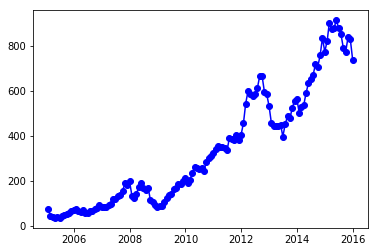

In [150]:

stockplot = plt.plot(clean_df['Date'], clean_df['Split'], marker='o', color='blue', label='AAPL Stock')
stockplot

## Running Queries For Housing Data

In [19]:
housing = quandl.get('ZILLOW/C537_MSPAH', start_date="2005-01-01", end_date="2015-12-31")

In [20]:
housing.head()

,Value
Date,
2005-01-31,806875.0
2005-02-28,803750.0
2005-03-31,849500.0
2005-04-30,855000.0
2005-05-31,884900.0


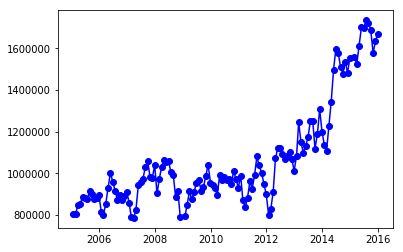

In [151]:
houseplot = plt.plot(housing.index, housing['Value'], marker='o', color='blue', label='AAPL Stock')

houseplot

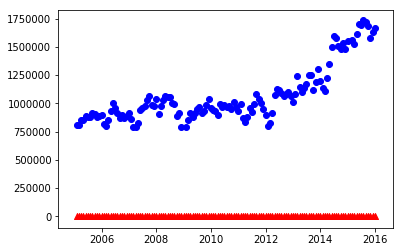

In [164]:
plt.scatter(housing.index, housing['Value'], marker='o', color='blue')
plt.scatter(clean_df.index, clean_df['Split'], marker='^', color='red')

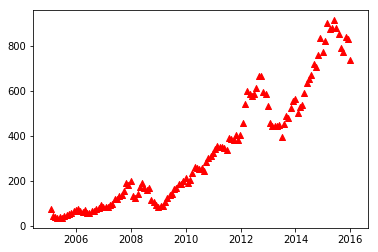

In [149]:
import scipy.stats as stats
import numpy as np
stats.ttest_ind(clean_df['Split'], housing['Value'], equal_var=False)

Ttest_indResult(statistic=-48.902178895925275, pvalue=3.934690545191819e-85)